# 01.Import libraries and data

In [407]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [408]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [409]:
# Define path

path = r'C:\Users\carol\Documents\DA\02 Data Inmersion\06 Advanced Analytics & Dashboard Design\Olist Analysis'

In [410]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'items_final_all.csv'), index_col = False)

In [411]:
# Check dataset

df.columns

Index(['Unnamed: 0', 'order_id', 'order_item_count', 'product_id', 'seller_id',
       'shipping_limit_date', 'item_price', 'item_shipping_cost',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_id', 'order_status',
       'timestamp_order', 'timestamp_payment_approval',
       'timestamp_order_dispatched', 'order_actual_delivery_date',
       'order_estimated_delivery_date', 'payment_method_count', 'payment_type',
       'payment_installments', 'order_amount', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'review_id', 'review_score', 'review_title', 'review_text',
       'survey_sent_date', 'survey_submision_date', 'order_product_item_count',
       'order_product', 'order_lead_time', 'order_da

# 02. Create new table with number of orders per day

In [412]:
# Create new table with product characteristics

df_sales = df.groupby(['timestamp_order']).agg({'order_id': ['nunique']})

In [413]:
df_sales.head()

,order_id
,nunique
timestamp_order,
2016-09-04 21:15:19,1
2016-09-05 00:15:34,1
2016-10-02 22:07:52,1
2016-10-03 09:44:50,1
2016-10-03 16:56:50,1


In [414]:
# Export new dataset

df_sales.to_csv(os.path.join(path, '02 Data','Prepared Data', 'sales.csv'))

In [415]:
# Import data

df_sales = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'sales.csv'), index_col = False)

In [416]:
# Check dataset

df_sales.head()

,Unnamed: 0,order_id
0,NaN,nunique
1,timestamp_order,NaN
2,2016-09-04 21:15:19,1
3,2016-09-05 00:15:34,1
4,2016-10-02 22:07:52,1


In [417]:
# Rename column

df_sales.rename(columns = {'Unnamed: 0' : 'timestamp_order', 'order_id' : 'order_count'}, inplace = True)

In [418]:
# Drop rows

df_sales = df_sales.drop([0, 1])

In [419]:
# Drop and reset index

df_sales = df_sales.reset_index(drop=True)

In [420]:
# Find missing values

df_sales.isnull().sum()

timestamp_order    0
order_count        0
dtype: int64

In [421]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96010 entries, 0 to 96009
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp_order  96010 non-null  object
 1   order_count      96010 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [422]:
# Change data type

df_sales['timestamp_order'] = df_sales['timestamp_order'].astype('datetime64[ns]')
df_sales['order_count'] = df_sales['order_count'].astype('int64')

In [423]:
df_sales.head()

,timestamp_order,order_count
0,2016-09-04 21:15:19,1
1,2016-09-05 00:15:34,1
2,2016-10-02 22:07:52,1
3,2016-10-03 09:44:50,1
4,2016-10-03 16:56:50,1


In [424]:
# Create new column 

df_sales['date_order'] = df_sales['timestamp_order'].dt.to_period('W')

In [425]:
df_sales

,timestamp_order,order_count,date_order
0,2016-09-04 21:15:19,1,2016-08-29/2016-09-04
1,2016-09-05 00:15:34,1,2016-09-05/2016-09-11
2,2016-10-02 22:07:52,1,2016-09-26/2016-10-02
3,2016-10-03 09:44:50,1,2016-10-03/2016-10-09
4,2016-10-03 16:56:50,1,2016-10-03/2016-10-09
...,...,...,...
96005,2018-08-29 14:18:23,1,2018-08-27/2018-09-02
96006,2018-08-29 14:18:28,1,2018-08-27/2018-09-02
96007,2018-08-29 14:52:00,1,2018-08-27/2018-09-02
96008,2018-08-29 15:00:37,1,2018-08-27/2018-09-02


In [426]:
df_sales

,timestamp_order,order_count,date_order
0,2016-09-04 21:15:19,1,2016-08-29/2016-09-04
1,2016-09-05 00:15:34,1,2016-09-05/2016-09-11
2,2016-10-02 22:07:52,1,2016-09-26/2016-10-02
3,2016-10-03 09:44:50,1,2016-10-03/2016-10-09
4,2016-10-03 16:56:50,1,2016-10-03/2016-10-09
...,...,...,...
96005,2018-08-29 14:18:23,1,2018-08-27/2018-09-02
96006,2018-08-29 14:18:28,1,2018-08-27/2018-09-02
96007,2018-08-29 14:52:00,1,2018-08-27/2018-09-02
96008,2018-08-29 15:00:37,1,2018-08-27/2018-09-02


In [427]:
df_sales.to_clipboard()

In [428]:
# Create new table with product characteristics

df_sales = df_sales.groupby(['date_order']).agg({'order_count': ['sum']})

In [429]:
df_sales.head()

,order_count
,sum
date_order,
2016-08-29/2016-09-04,1
2016-09-05/2016-09-11,1
2016-09-26/2016-10-02,1
2016-10-03/2016-10-09,264
2016-10-10/2016-10-16,36


In [430]:
# Export new dataset

df_sales.to_csv(os.path.join(path, '02 Data','Prepared Data', 'sales_2.csv'))

In [431]:
# Import data

df_sales = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'sales_2.csv'), index_col = False)

In [432]:
# Check dataset

df_sales.head()

,Unnamed: 0,order_count
0,NaN,sum
1,date_order,NaN
2,2016-08-29/2016-09-04,1
3,2016-09-05/2016-09-11,1
4,2016-09-26/2016-10-02,1


In [433]:
# Rename column

df_sales.rename(columns = {'Unnamed: 0' : 'date_order', 'order_count' : 'num_of_orders'}, inplace = True)

In [434]:
# Drop rows

df_sales = df_sales.drop([0, 1])

In [435]:
# Drop and reset index

df_sales.reset_index(drop=True)

,date_order,num_of_orders
0,2016-08-29/2016-09-04,1
1,2016-09-05/2016-09-11,1
2,2016-09-26/2016-10-02,1
3,2016-10-03/2016-10-09,264
4,2016-10-10/2016-10-16,36
...,...,...
89,2018-08-06/2018-08-12,1960
90,2018-08-13/2018-08-19,1842
91,2018-08-20/2018-08-26,1054
92,2018-08-27/2018-09-02,114


In [436]:
# Export new dataset

df_sales.to_csv(os.path.join(path, '02 Data','Prepared Data', 'sales_final.csv'))

In [437]:
# Import data

data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'sales_final.csv'), index_col = False)

In [438]:
data.head()

,Unnamed: 0,date_order,num_of_orders
0,2,2016-08-29/2016-09-04,1
1,3,2016-09-05/2016-09-11,1
2,4,2016-09-26/2016-10-02,1
3,5,2016-10-03/2016-10-09,264
4,6,2016-10-10/2016-10-16,36


In [439]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     94 non-null     int64 
 1   date_order     94 non-null     object
 2   num_of_orders  94 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ KB


In [442]:
# Change data type

data['date_order'] = data['date_order'].astype('datetime64[ns]')

ValueError: offset must be a timedelta strictly between -timedelta(hours=24) and timedelta(hours=24).

In [443]:
# Drop columns

data = data.drop(columns = ['Unnamed: 0'])

In [444]:
# Change data type

# data['date_order'] = data['date_order'].astype('datetime64[ns]')

In [445]:
data.set_index('date_order', inplace=True)

In [446]:
data.shape

(94, 1)

In [447]:
data.columns

Index(['num_of_orders'], dtype='object')

In [448]:
type(data)

pandas.core.frame.DataFrame

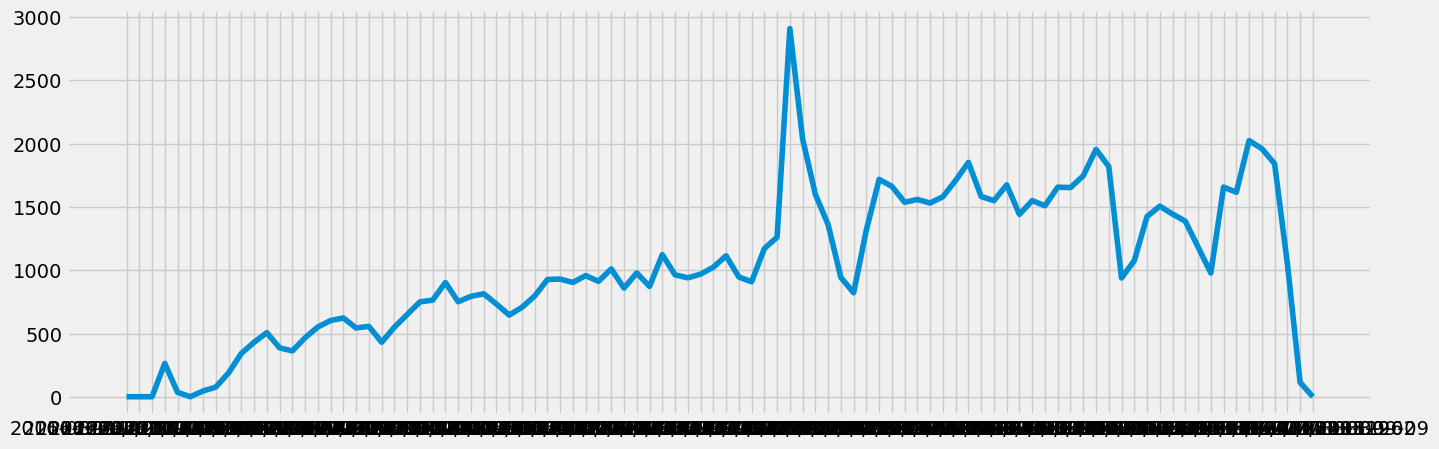

In [449]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

### The sharp increase in orders coincides with Black Friday on Nov 24th. Customers are expected to have taken advantage of the discount sales which showed that orders peaked during that day

# 03. Subsetting, wrangling, and cleaning time-series data

In [450]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [451]:
data_2.tail()

,date_order,num_of_orders
89,2018-08-06/2018-08-12,1960
90,2018-08-13/2018-08-19,1842
91,2018-08-20/2018-08-26,1054
92,2018-08-27/2018-09-02,114
93,2018-09-03/2018-09-09,1


In [452]:
data_sub = data_2.loc[(data_2['date_order'] >= '2017-01-16') & (data_2['date_order'] < '2018-09-01')]

## The data only seems to be complete between January 2017 and August 2018

In [453]:
data_sub.shape

(85, 2)

In [454]:
data_sub.head()

,date_order,num_of_orders
8,2017-01-16/2017-01-22,189
9,2017-01-23/2017-01-29,343
10,2017-01-30/2017-02-05,431
11,2017-02-06/2017-02-12,507
12,2017-02-13/2017-02-19,387


In [455]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 2016-08-29/2016-09-04 to 2018-09-03/2018-09-09
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_of_orders  94 non-null     int64
dtypes: int64(1)
memory usage: 1.5+ KB


In [456]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['date_order']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['date_order'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

ValueError: offset must be a timedelta strictly between -timedelta(hours=24) and timedelta(hours=24).

ValueError: offset must be a timedelta strictly between -timedelta(hours=24) and timedelta(hours=24).